<h1>Практична робота №7 <h1>
<h2>Пруніч Сергій МІТ-31<h2>

In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

# Генеруємо дані для X1, X2 та y_binary
num_samples = 1000
X = np.random.randn(num_samples, 2)  # Створення масиву X з двома колонками
noise = np.random.randn(num_samples, 2) / 3  # Генерування шуму

# Залежність між X1 та X2 з шумом
X[:, 1] = 0.5 * X[:, 0] + noise[:, 1]

# Формування бінарного класу на основі залежності між X1 та X2
y_binary = (X[:, 1] > X[:, 0]).astype(int)

# Формування мультикласового класу на основі залежності між X1 та X2
y_multi = np.zeros(num_samples, dtype=int)
y_multi[(X[:, 0] >= -0.3) & (X[:, 1] >= 0)] = 1  # середній
y_multi[(X[:, 0] <= -0.3) & (X[:, 1] <= -0.2)] = 0  # низький
y_multi[(X[:, 0] >= 0.4) & (X[:, 1] >= 0.3)] = 2  # високий

In [23]:
# Бінарна класифікація
model_binary = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_binary = model_binary.fit(X, y_binary, epochs=50, validation_split=0.2, verbose=0)

# Мультикласова класифікація
model_multi = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_multi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_multi = model_multi.fit(X, y_multi, epochs=50, validation_split=0.2, verbose=0)

In [14]:
# Мультикласова класифікація_2
model_multi_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_multi_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_multi_2 = model_multi_2.fit(X, y_multi, epochs=50, validation_split=0.2, verbose=0)

In [15]:
print(model_multi.evaluate(X, y_multi), "- first_multi")
print(model_multi_2.evaluate(X, y_multi), "second_multi")

32/32 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9930
[0.03808769956231117, 0.9929999709129333] - first_multi
32/32 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9910
[0.058517936617136, 0.9909999966621399] second_multi


In [16]:
# Бінарна класифікація_2
model_binary_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_binary_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_binary_improved = model_binary_2.fit(X, y_binary, epochs=300, validation_split=0.2, verbose=0, callbacks=[
    tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 if epoch < 100 else 0.0001)
])

In [17]:
# Функція для візуалізації
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs - ' + title)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs - ' + title)
    plt.legend()

    plt.tight_layout()
    plt.show()

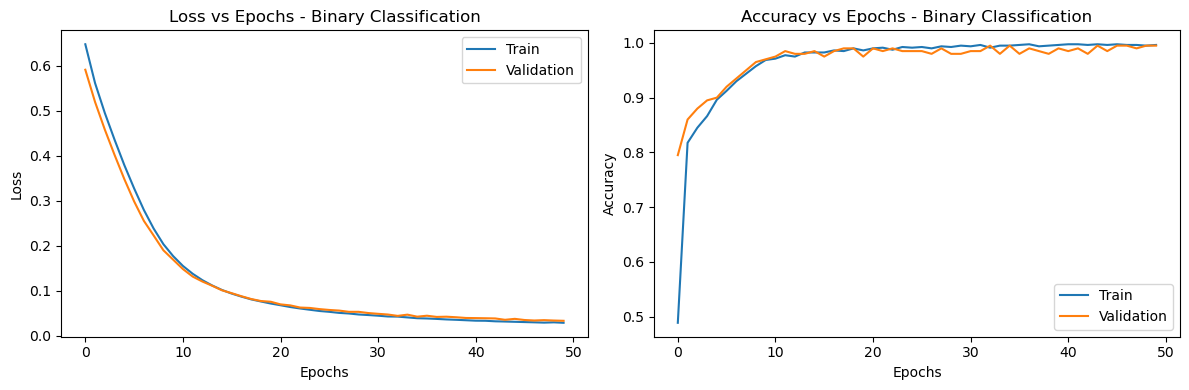

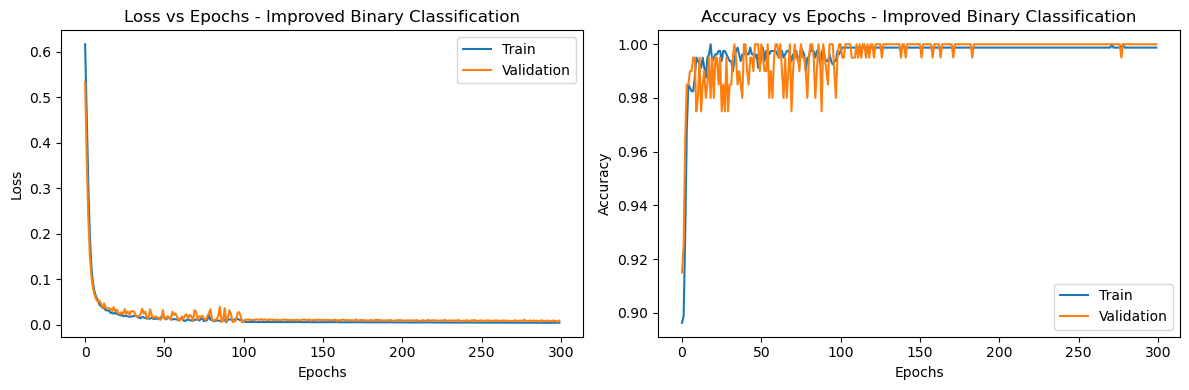

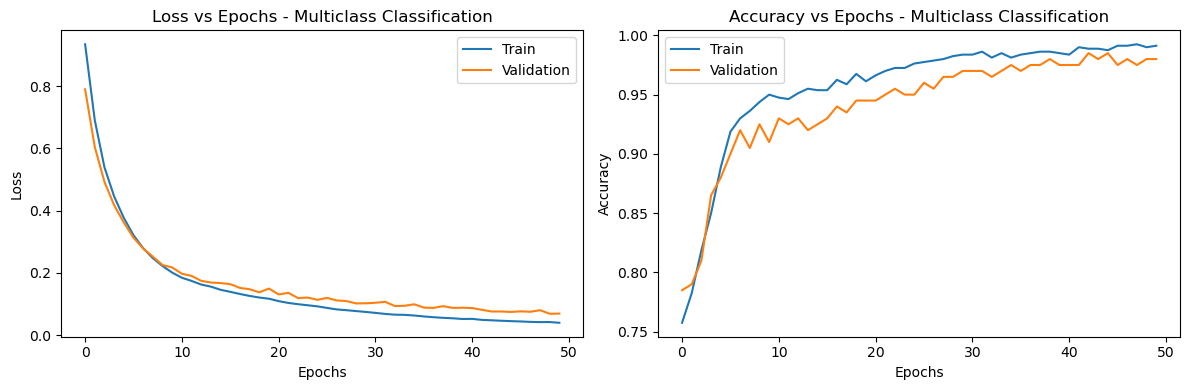

32/32 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9910
[0.02866467274725437, 0.996999979019165] - binary 
 [0.0051660132594406605, 0.9990000128746033] - binary_2 
 [0.04429689049720764, 0.9909999966621399] - multi 



In [24]:

# Візуалізація результатів
plot_history(history_binary, 'Binary Classification')
plot_history(history_binary_improved, 'Improved Binary Classification')
plot_history(history_multi, 'Multiclass Classification')
print(model_binary.evaluate(X,  y_binary),"- binary \n", model_binary_2.evaluate(X, y_binary),"- binary_2 \n", model_multi.evaluate(X, y_multi),
      "- multi \n")